# Swayable Data Science Challenge

Work FLow:

0. Clean up the data to get the date in a more readable format, to have consistent demographic categories for each dataset, etc. 

1. Swayable data has info on individual people instead of the counts of each demographic group on each date. So first, I will resort the table to have the average values of each dmeographic group on each date and the percentage of people that indicated that they were vaccinated in that group on each date. All in all, make the Swayable data look like the CDC data. 

2. 

## I. Create Conda Environment and Install Necessary Packages 
For each project, I like to create a new environment. I have also exported this environment as 'swayable_challenge.yml'. This ensures isolation between projects, helps maintain reproducibility by documenting dependencies, allows flexibility in experimenting with different libraries and configurations. Although I'm predicting that this project won't require specific libraries and dependencies, I'm doing it here out of good habit and also because I'm sharing this project and creating a seperate environment will enable portability of this project across different machines.

## II. Import 
I like to import everything at the top of my code. Sometimes showing the imports later in the code make it more clear where I'm using each package, but I prefer the organization of reading everything in at the beggining and making a comment next to the import if I'm using a new package. :) 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns

import requests 
import json
import matplotlib.pyplot as plt

from scipy import stats

## 1. Data Preparation and Exploration: 
The first thing I want to do is visualize the raw data. I'm using Pandas -- which is probably the most standard way to do this -- because I think it's the cleanest and most simple way to view the data.  In this way, I can get to know my dataset and find out what it's all about. This step is super important because it sets the stage for everything else I'll be doing.

In [2]:
groundtruth_df = pd.read_csv('groundtruth.csv') #I downloaded only 2020 - 2022 since that's what I have with Swayable Data
groundtruth_df

,Date,Location,Demographic_Category,census,Administered_Dose1,Series_Complete_Yes,Booster_Doses,Second_Booster,Administered_Dose1_pct_agegroup,Series_Complete_Pop_pct_agegroup,Booster_Doses_Vax_pct_agegroup,Second_Booster_Vax_pct_agegroup
0,12/31/2022 12:00:00 AM,FL,Male_Ages_<5yrs,582738.0,18342.0,9095.0,86.0,NaN,3.1,1.6,0.9,NaN
1,12/31/2022 12:00:00 AM,CA,Male_Ages_<5yrs,1220085.0,133172.0,75846.0,2009.0,NaN,10.9,6.2,2.6,NaN
2,12/31/2022 12:00:00 AM,GA,Female_Ages_75+_yrs,350253.0,322115.0,288197.0,203443.0,103983.0,92.0,82.3,70.6,51.1
3,12/31/2022 12:00:00 AM,CO,Female_Ages_75+_yrs,183092.0,188312.0,170746.0,143731.0,104179.0,95.0,93.3,84.2,72.5
4,12/31/2022 12:00:00 AM,AS,Ages_<2yrs,1674.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1932415,12/13/2020 12:00:00 AM,SD,Male_Ages_25-39_yrs,89937.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1932416,12/13/2020 12:00:00 AM,AK,Male_Ages_5-11_yrs,36851.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1932417,12/13/2020 12:00:00 AM,GU,Male_Ages_5-11_yrs,11091.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1932418,12/13/2020 12:00:00 AM,AL,Male_Ages_25-49_yrs,755907.0,15.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [3]:
# The text of questions asked
questions_df = pd.read_csv('questions.csv') 
questions_df

,Unnamed: 0,Name,Type,Question Text
0,0,ZipCode,zip,What is your zip code?
1,1,Gender,multChoice,What is your gender?
2,2,Religion_Alt1,multChoice,"What is your present religion, if any?"
3,3,Education_Alt2,multChoice,What is your educational background?
4,4,AnnualHouseholdIncome,dollar,What is your approximate annual household inco...
5,5,Religiosity_Alt2,scale,How important would you say religion is in you...
6,6,PoliticalPartyNoOp,scale,"In terms of politics, do you consider yourself..."
7,7,PoliticalBeliefsNoOp,scale,On a scale from very liberal to very conservat...
8,8,VotingFrequencyNoOp,scale,How often would you say you vote?
9,9,SocialMediaUse2,scale,How often do you visit social media sites like...


In [4]:
# Full responses to of  “COVID tracker”,
responses_df = pd.read_csv('responses.csv') 
responses_df

/var/folders/tq/_2l7ndyd6p11lzt134zhdwvh0000gn/T/ipykernel_70715/102320906.py:2: DtypeWarning: Columns (4,37) have mixed types. Specify dtype option on import or set low_memory=False.
  responses_df = pd.read_csv('responses.csv')


,_id,startTime,endTime,weight,ZipCode,Gender,Religion_Alt1,Education_Alt2,AnnualHouseholdIncome,Religiosity_Alt2,...,calculatedFields.postalcodeEthnicityProportionNative,calculatedFields.postalcodeEthnicityProportionOther,calculatedFields.postalcodeEthnicityProportionPacific,calculatedFields.postalcodeEthnicityProportionWhiteNonHispanic,calculatedFields.postalcodeSexDiversity,calculatedFields.postalcodeSexProportionFemale,calculatedFields.postalcodeSexProportionMale,calculatedFields.postalcodeUrbanization,calculatedFields.state,calculatedFields.urbanization
0,5fadb3a99b4fb100333792b0,2020-11-12 22:09:43.864,2020-11-12 22:14:01.179,1.973157,90001,male,nothing-in-particular,college,150000.0,0.0,...,0.008212,0.611533,0.000222,0.006492,0.999721,0.509830,0.490170,1.0,CA,Large City
1,5fadb56a19ba4c001e0fc37a,2020-11-12 22:16:11.386,2020-11-12 22:21:30.946,1.973157,11763,female,catholic,highschool,NaN,7.2,...,0.000456,0.013931,NaN,0.633926,0.997530,0.529249,0.470751,1.0,NY,Suburban
2,5fadb6887de2b300279d4900,2020-11-12 22:23:12.210,2020-11-12 22:26:16.535,0.047266,08876,female,atheist,school,NaN,5.3,...,0.000991,0.031944,NaN,0.696914,0.999903,0.505790,0.494210,1.0,NJ,Suburban
3,5fadb887b56023002ea2d328,2020-11-12 22:28:40.338,2020-11-12 22:34:47.545,1.973157,43235,male,atheist,college,65.0,0.0,...,0.001071,0.024688,NaN,0.762314,0.998300,0.524271,0.475729,1.0,OH,Large City
4,5fadb888aa11b2001dff5a89,2020-11-12 22:32:08.374,2020-11-12 22:34:48.601,1.973157,95616,female,mormon,some-college,200000.0,7.6,...,0.001278,0.047495,0.002437,0.527063,0.995148,0.540984,0.459016,1.0,CA,Suburban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86483,63b092e26b49dc0036921aaa,2022-12-31 19:46:48.674,2022-12-31 19:52:02.496,1.973157,11003,female,nothing-in-particular,college,NaN,10.0,...,0.001298,0.116222,0.000286,0.152644,0.999355,0.514954,0.485046,1.0,NY,Large City
86484,63b0987053af540037336976,2022-12-31 20:07:26.724,2022-12-31 20:15:44.328,1.973157,6804,male,nothing-in-particular,college,NaN,6.4,...,0.000000,0.011182,0.001165,0.857892,0.999995,0.501340,0.498660,2.0,CT,Small City
86485,63b09dba873424003add4654,2022-12-31 20:32:49.334,2022-12-31 20:38:18.786,1.973157,46723,female,catholic,college,NaN,10.0,...,0.000000,0.005264,0.000000,0.975128,0.999563,0.512304,0.487696,2.0,IN,Small City
86486,63b0a6f57529ff003b0e14e8,2022-12-31 21:12:16.003,2022-12-31 21:17:41.898,0.187162,36027,female,nothing-in-particular,highschool,1000.0,0.0,...,0.001794,0.048248,0.000000,0.453258,0.999556,0.512398,0.487602,6.0,AL,Rural


## 2. Clean It Up: Make the tables consistant with each other

In [5]:
#remove every row where the participants were not attentive :) 
responses_df = responses_df[responses_df['calculatedFields.attentive'] != False]

#remove every row where the participants were not attentive in attncheck5
strings_to_check = ['active_internet', 'older_17', 'been_in_car', 'watch_tv']
min_required_matches = 2

def check_string_presence(row):
    count = sum(1 for string in strings_to_check if string in row['AttnCheckMultSelect5'])
    return count >= min_required_matches

filtered_df = responses_df[responses_df.apply(check_string_presence, axis=1)]


#remove the attentive columns because I don't it anymore. 
responses_df = responses_df.drop(['calculatedFields.attentive'], axis=1)
responses_df = responses_df.drop(['AttnCheckMultSelect5'], axis=1)

In [6]:
responses_df

,_id,startTime,endTime,weight,ZipCode,Gender,Religion_Alt1,Education_Alt2,AnnualHouseholdIncome,Religiosity_Alt2,...,calculatedFields.postalcodeEthnicityProportionNative,calculatedFields.postalcodeEthnicityProportionOther,calculatedFields.postalcodeEthnicityProportionPacific,calculatedFields.postalcodeEthnicityProportionWhiteNonHispanic,calculatedFields.postalcodeSexDiversity,calculatedFields.postalcodeSexProportionFemale,calculatedFields.postalcodeSexProportionMale,calculatedFields.postalcodeUrbanization,calculatedFields.state,calculatedFields.urbanization
0,5fadb3a99b4fb100333792b0,2020-11-12 22:09:43.864,2020-11-12 22:14:01.179,1.973157,90001,male,nothing-in-particular,college,150000.0,0.0,...,0.008212,0.611533,0.000222,0.006492,0.999721,0.509830,0.490170,1.0,CA,Large City
1,5fadb56a19ba4c001e0fc37a,2020-11-12 22:16:11.386,2020-11-12 22:21:30.946,1.973157,11763,female,catholic,highschool,NaN,7.2,...,0.000456,0.013931,NaN,0.633926,0.997530,0.529249,0.470751,1.0,NY,Suburban
2,5fadb6887de2b300279d4900,2020-11-12 22:23:12.210,2020-11-12 22:26:16.535,0.047266,08876,female,atheist,school,NaN,5.3,...,0.000991,0.031944,NaN,0.696914,0.999903,0.505790,0.494210,1.0,NJ,Suburban
3,5fadb887b56023002ea2d328,2020-11-12 22:28:40.338,2020-11-12 22:34:47.545,1.973157,43235,male,atheist,college,65.0,0.0,...,0.001071,0.024688,NaN,0.762314,0.998300,0.524271,0.475729,1.0,OH,Large City
4,5fadb888aa11b2001dff5a89,2020-11-12 22:32:08.374,2020-11-12 22:34:48.601,1.973157,95616,female,mormon,some-college,200000.0,7.6,...,0.001278,0.047495,0.002437,0.527063,0.995148,0.540984,0.459016,1.0,CA,Suburban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86482,63b083abeefc510046d6fb4c,2022-12-31 18:43:15.721,2022-12-31 18:47:07.200,1.463021,62901,male,nothing-in-particular,school,NaN,4.8,...,0.001546,0.019046,0.000000,0.608750,0.999984,0.497643,0.502357,3.0,IL,Small City
86484,63b0987053af540037336976,2022-12-31 20:07:26.724,2022-12-31 20:15:44.328,1.973157,6804,male,nothing-in-particular,college,NaN,6.4,...,0.000000,0.011182,0.001165,0.857892,0.999995,0.501340,0.498660,2.0,CT,Small City
86485,63b09dba873424003add4654,2022-12-31 20:32:49.334,2022-12-31 20:38:18.786,1.973157,46723,female,catholic,college,NaN,10.0,...,0.000000,0.005264,0.000000,0.975128,0.999563,0.512304,0.487696,2.0,IN,Small City
86486,63b0a6f57529ff003b0e14e8,2022-12-31 21:12:16.003,2022-12-31 21:17:41.898,0.187162,36027,female,nothing-in-particular,highschool,1000.0,0.0,...,0.001794,0.048248,0.000000,0.453258,0.999556,0.512398,0.487602,6.0,AL,Rural


I will replace  NaN values in float columns with median values -- less senstive to outliers than replacing with average values

In [7]:
# Identify columns with float data type
float_columns = responses_df.select_dtypes(include=['float']).columns

# Replace NaN values with column-wise medians for float columns only and use median and use the median because it's less senstiive to outliers 

responses_df[float_columns] = responses_df[float_columns].fillna(responses_df[float_columns].median())


Convert time to just the year -- I don't need the exact start and end time

In [8]:
#Writing a function to convert the date to year because I'll use this later with CDC data too. 

def date_to_year(dataframe,time_col): 
    # Convert the 'end_time' column to datetime format
    dataframe[time_col] = pd.to_datetime(dataframe[time_col])

    #Extract the day and year from the 'end_time' column
    dataframe['day'] = dataframe[time_col].dt.day
    dataframe['year'] = dataframe[time_col].dt.year
    dataframe['month'] = dataframe[time_col].dt.month


    # Remove the time component from the 'end_time' column and rename it as date
    dataframe[time_col] = dataframe[time_col].dt.strftime('%Y-%m')

    return dataframe

#apply the function to responses_df 
responses_df =  date_to_year(responses_df,'endTime')

#rename the endTime column just as the date for consistancy 
responses_df.rename(columns={'endTime': 'Date'}, inplace=True)

 #remove the start time column -- I don't need it.
responses_df = responses_df.drop(['startTime'], axis=1)


/var/folders/tq/_2l7ndyd6p11lzt134zhdwvh0000gn/T/ipykernel_70715/3598210979.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataframe['day'] = dataframe[time_col].dt.day
/var/folders/tq/_2l7ndyd6p11lzt134zhdwvh0000gn/T/ipykernel_70715/3598210979.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataframe['year'] = dataframe[time_col].dt.year
/var/folders/tq/_2l7ndyd6p11lzt134zhdwvh0000gn/T/ipykernel_70715/3598210979.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

Adding in an age column and then map those ages to age ranges consistant with CDC

In [9]:
responses_df['BirthYear2021']
responses_df['Age'] = 2021 - responses_df['BirthYear2021']

def map_age_range(age):
    if 2 <= age <= 4:
        return 'Ages_2-4_yrs'
    elif 5 <= age <= 11:
        return 'Ages_5-11_yrs'
    elif 12 <= age <= 17:
        return 'Ages_12-17_yrs'
    elif 18 <= age <= 24:
        return 'Ages_18-24_yrs'
    elif 25 <= age <= 39:
        return 'Ages_25-39_yrs'
    elif 40 <= age <= 49:
        return 'Ages_40-49_yrs'
    elif 50 <= age <= 64:
        return 'Ages_50-64_yrs'
    elif 65 <= age <= 74:
        return 'Ages_65-74_yrs'
    elif age >= 75:
        return 'Ages_75+_yrs'
    
responses_df['age_range'] = responses_df['Age'].apply(map_age_range)

#capatalize the first letter in values for Gender to be consistant with CDC
responses_df['Gender'] = responses_df['Gender'].str.capitalize()

responses_df['Demographic_Category'] = responses_df['Gender'] + '_' + responses_df['age_range']

# Reorder the columns for orginization 
column_order = ['Gender', 'Demographic_Category'] + [col for col in responses_df.columns if col != 'Gender' and col != 'Demographic_Category']
responses_df = responses_df[column_order]

/var/folders/tq/_2l7ndyd6p11lzt134zhdwvh0000gn/T/ipykernel_70715/4033479506.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  responses_df['Age'] = 2021 - responses_df['BirthYear2021']
/var/folders/tq/_2l7ndyd6p11lzt134zhdwvh0000gn/T/ipykernel_70715/4033479506.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  responses_df['age_range'] = responses_df['Age'].apply(map_age_range)
/var/folders/tq/_2l7ndyd6p11lzt134zhdwvh0000gn/T/ipykernel_70715/4033479506.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usual

Remap some columns to have float values

In [10]:
vaccine_mapping= {
    'no-and-i-do-not-intend-to-get-one': 0,
    'no-but-i-intend-to-get-one': 0,
    'i-have-an-appointment(s)-scheduled': 1,
    'yes': 1
}
responses_df['ReceivedCovidVaccine'] = responses_df['ReceivedCovidVaccine'].replace(vaccine_mapping)

Removing un-needed columns, reordering and renamaing some columns to match the formatting of the CDC columns

In [11]:

# Remove specified columns
columns_to_remove = ['ZipCode', 'day', 'month','year','age_range' ,'BirthYear2021','_id','MostTrustedSources',
                     'calculatedFields.urbanization','calculatedFields.designatedMarketAreaName','calculatedFields.county',
                     'calculatedFields.city', 'calculatedFields.ZipCode5','calculatedFields.censusRegion']
responses_df.drop(columns=columns_to_remove, inplace=True)

# Reorder columns
responses_df = responses_df[['Date', 'calculatedFields.state'] + [col for col in responses_df.columns if col != 'Date' and col != 'calculatedFields.state']]

# Rename the 'calculatedFields.state' column to 'location'
responses_df.rename(columns={'calculatedFields.state': 'location'}, inplace=True)

In [12]:
responses_df

,Date,location,Gender,Demographic_Category,weight,Religion_Alt1,Education_Alt2,AnnualHouseholdIncome,Religiosity_Alt2,PoliticalPartyNoOp,...,calculatedFields.postalcodeEthnicityProportionMixed,calculatedFields.postalcodeEthnicityProportionNative,calculatedFields.postalcodeEthnicityProportionOther,calculatedFields.postalcodeEthnicityProportionPacific,calculatedFields.postalcodeEthnicityProportionWhiteNonHispanic,calculatedFields.postalcodeSexDiversity,calculatedFields.postalcodeSexProportionFemale,calculatedFields.postalcodeSexProportionMale,calculatedFields.postalcodeUrbanization,Age
0,2020-11,CA,Male,Male_Ages_18-24_yrs,1.973157,nothing-in-particular,college,150000.0,0.0,1.5,...,0.012761,0.008212,0.611533,0.000222,0.006492,0.999721,0.509830,0.490170,1.0,22.0
1,2020-11,NY,Female,Female_Ages_18-24_yrs,1.973157,catholic,highschool,50000.0,7.2,9.9,...,0.019406,0.000456,0.013931,0.000993,0.633926,0.997530,0.529249,0.470751,1.0,22.0
2,2020-11,NJ,Female,Female_Ages_18-24_yrs,0.047266,atheist,school,50000.0,5.3,4.8,...,0.017977,0.000991,0.031944,0.000993,0.696914,0.999903,0.505790,0.494210,1.0,22.0
3,2020-11,OH,Male,Male_Ages_18-24_yrs,1.973157,atheist,college,65.0,0.0,5.1,...,0.027663,0.001071,0.024688,0.000993,0.762314,0.998300,0.524271,0.475729,1.0,22.0
4,2020-11,CA,Female,Female_Ages_18-24_yrs,1.973157,mormon,some-college,200000.0,7.6,1.2,...,0.064832,0.001278,0.047495,0.002437,0.527063,0.995148,0.540984,0.459016,1.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86482,2022-12,IL,Male,Male_Ages_18-24_yrs,1.463021,nothing-in-particular,school,50000.0,4.8,5.0,...,0.037375,0.001546,0.019046,0.000000,0.608750,0.999984,0.497643,0.502357,3.0,18.0
86484,2022-12,CT,Male,Male_Ages_18-24_yrs,1.973157,nothing-in-particular,college,50000.0,6.4,4.9,...,0.027956,0.000000,0.011182,0.001165,0.857892,0.999995,0.501340,0.498660,2.0,20.0
86485,2022-12,IN,Female,Female_Ages_18-24_yrs,1.973157,catholic,college,50000.0,10.0,5.0,...,0.007896,0.000000,0.005264,0.000000,0.975128,0.999563,0.512304,0.487696,2.0,19.0
86486,2022-12,AL,Female,Female_Ages_18-24_yrs,0.187162,nothing-in-particular,highschool,1000.0,0.0,3.4,...,0.010188,0.001794,0.048248,0.000000,0.453258,0.999556,0.512398,0.487602,6.0,18.0


Creating a function to bin the age groups and dates for the median/mean of columns

In [13]:
def pivot(dataframe,value_col,mean_or_med): 
    responses_dfresponses_df_val= dataframe[['Date','Demographic_Category',value_col]]

    # Group the data by 'date' and 'demographic_category' columns and calculate the median or mean of the category. If it's possible there could be significant outliers in the data, then median will probably be best
    #otherwise, mean will probably be best. 
    if mean_or_med == 'mean':
         grouped_df = responses_dfresponses_df_val.groupby(['Date', 'Demographic_Category'])[value_col].mean().reset_index()
    
    if mean_or_med == 'med':
        grouped_df = responses_dfresponses_df_val.groupby(['Date', 'Demographic_Category'])[value_col].median().reset_index()

    # Pivot the table to have 'date' as index, 'Gender' as columns, and mean/median for the value_col 
    pivot_df = grouped_df.pivot(index='Date', columns='Demographic_Category', values=value_col) 

    pivot_df = pivot_df.reset_index() 

    #average column to compute the average value over all of the demographics
    pivot_df['Avg_All_Demographics'] = pivot_df.iloc[:, 1:].mean(axis=1) 

    return pivot_df

function to normalize

In [14]:
def normalize(df):
    for c in df.columns:
        if c != 'Date':
               min_val = df.min()
               max_val = df.max()
               normalized_df =  (df - min_val) / (max_val - min_val)
    return normalized_df


In [15]:
avg_vax_pct_swybl = pivot(responses_df,'ReceivedCovidVaccine','mean')
avg_vax_pct_swybl

Demographic_Category,Date,Female_Ages_18-24_yrs,Female_Ages_25-39_yrs,Female_Ages_40-49_yrs,Female_Ages_50-64_yrs,Female_Ages_65-74_yrs,Female_Ages_75+_yrs,Male_Ages_18-24_yrs,Male_Ages_25-39_yrs,Male_Ages_40-49_yrs,Male_Ages_50-64_yrs,Male_Ages_65-74_yrs,Male_Ages_75+_yrs,Other_Ages_18-24_yrs,Other_Ages_25-39_yrs,Other_Ages_40-49_yrs,Other_Ages_50-64_yrs,Other_Ages_65-74_yrs,Other_Ages_75+_yrs,Avg_All_Demographics
0,2020-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2021-04,0.417000,NaN,NaN,NaN,NaN,NaN,0.451081,NaN,NaN,NaN,NaN,NaN,0.410646,NaN,NaN,NaN,NaN,NaN,0.426242
6,2021-05,0.532468,NaN,NaN,NaN,NaN,NaN,0.595361,NaN,NaN,NaN,NaN,NaN,0.463235,NaN,NaN,NaN,NaN,NaN,0.530355
7,2021-06,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
8,2021-07,0.631579,0.645695,0.587302,0.818182,0.923077,1.000000,0.660279,0.616000,0.733333,0.857143,0.666667,1.000000,0.678082,0.769231,0.666667,1.00,NaN,NaN,0.765827
9,2021-08,0.636156,0.671642,0.646209,0.785714,0.902439,0.900000,0.604478,0.713604,0.672840,0.708738,0.925926,0.857143,0.731844,0.853933,0.785714,0.75,0.4,0.75,0.738688


### CDC Groundtruth

To compare the two datasets, I only want to use the demographic cateogories that are also in Swayable Data. So, I'll cut the rest of the demographic categories out for now.

In [16]:
# Get unique values from the 'Demographic_Category' column in responses_df
demographic_categories = responses_df['Demographic_Category'].unique()

# Filter the rows in groundtruth_df to just have the Demographic Categories that are in Responses_df 
groundtruth_df = groundtruth_df[groundtruth_df['Demographic_Category'].isin(demographic_categories)]

Convert Date to the same Date format as the Swayable Data

In [17]:
groundtruth_df = date_to_year(groundtruth_df,'Date').sort_values('Date')

/var/folders/tq/_2l7ndyd6p11lzt134zhdwvh0000gn/T/ipykernel_70715/3598210979.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataframe[time_col] = pd.to_datetime(dataframe[time_col])
/var/folders/tq/_2l7ndyd6p11lzt134zhdwvh0000gn/T/ipykernel_70715/3598210979.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[time_col] = pd.to_datetime(dataframe[time_col])
/var/folders/tq/_2l7ndyd6p11lzt134zhdwvh0000gn/T/ipykernel_70715/3598210979.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

Create a CDC Table with Only the percentage of people who have had at least one vaccine. Since the Swayable survey doesn't specify how many vaccine is equal to getting a vaccine, we can assume they have had at least one, but not necssarily the full series.

In [18]:
cdc_1vax_df = pivot(groundtruth_df,'Administered_Dose1_pct_agegroup','mean')

#then want to noramlize all of the percentages over 1, just like the swayable data
normalized_columns = cdc_1vax_df.iloc[:, 1:].div(100)
# Combine the normalized columns with the date column
cdc_1vax_df= pd.concat([cdc_1vax_df.iloc[:, 0], normalized_columns], axis=1)

## 3. Compare CDC Data to Swayable Data
 **Question 1:** How does our survey data differ from CDC ground truth? Make plots that illustrate these differences and how they change over time? 

### 3.1 Percentage of Demographic Catagories in Swayable data vs CDC Data 

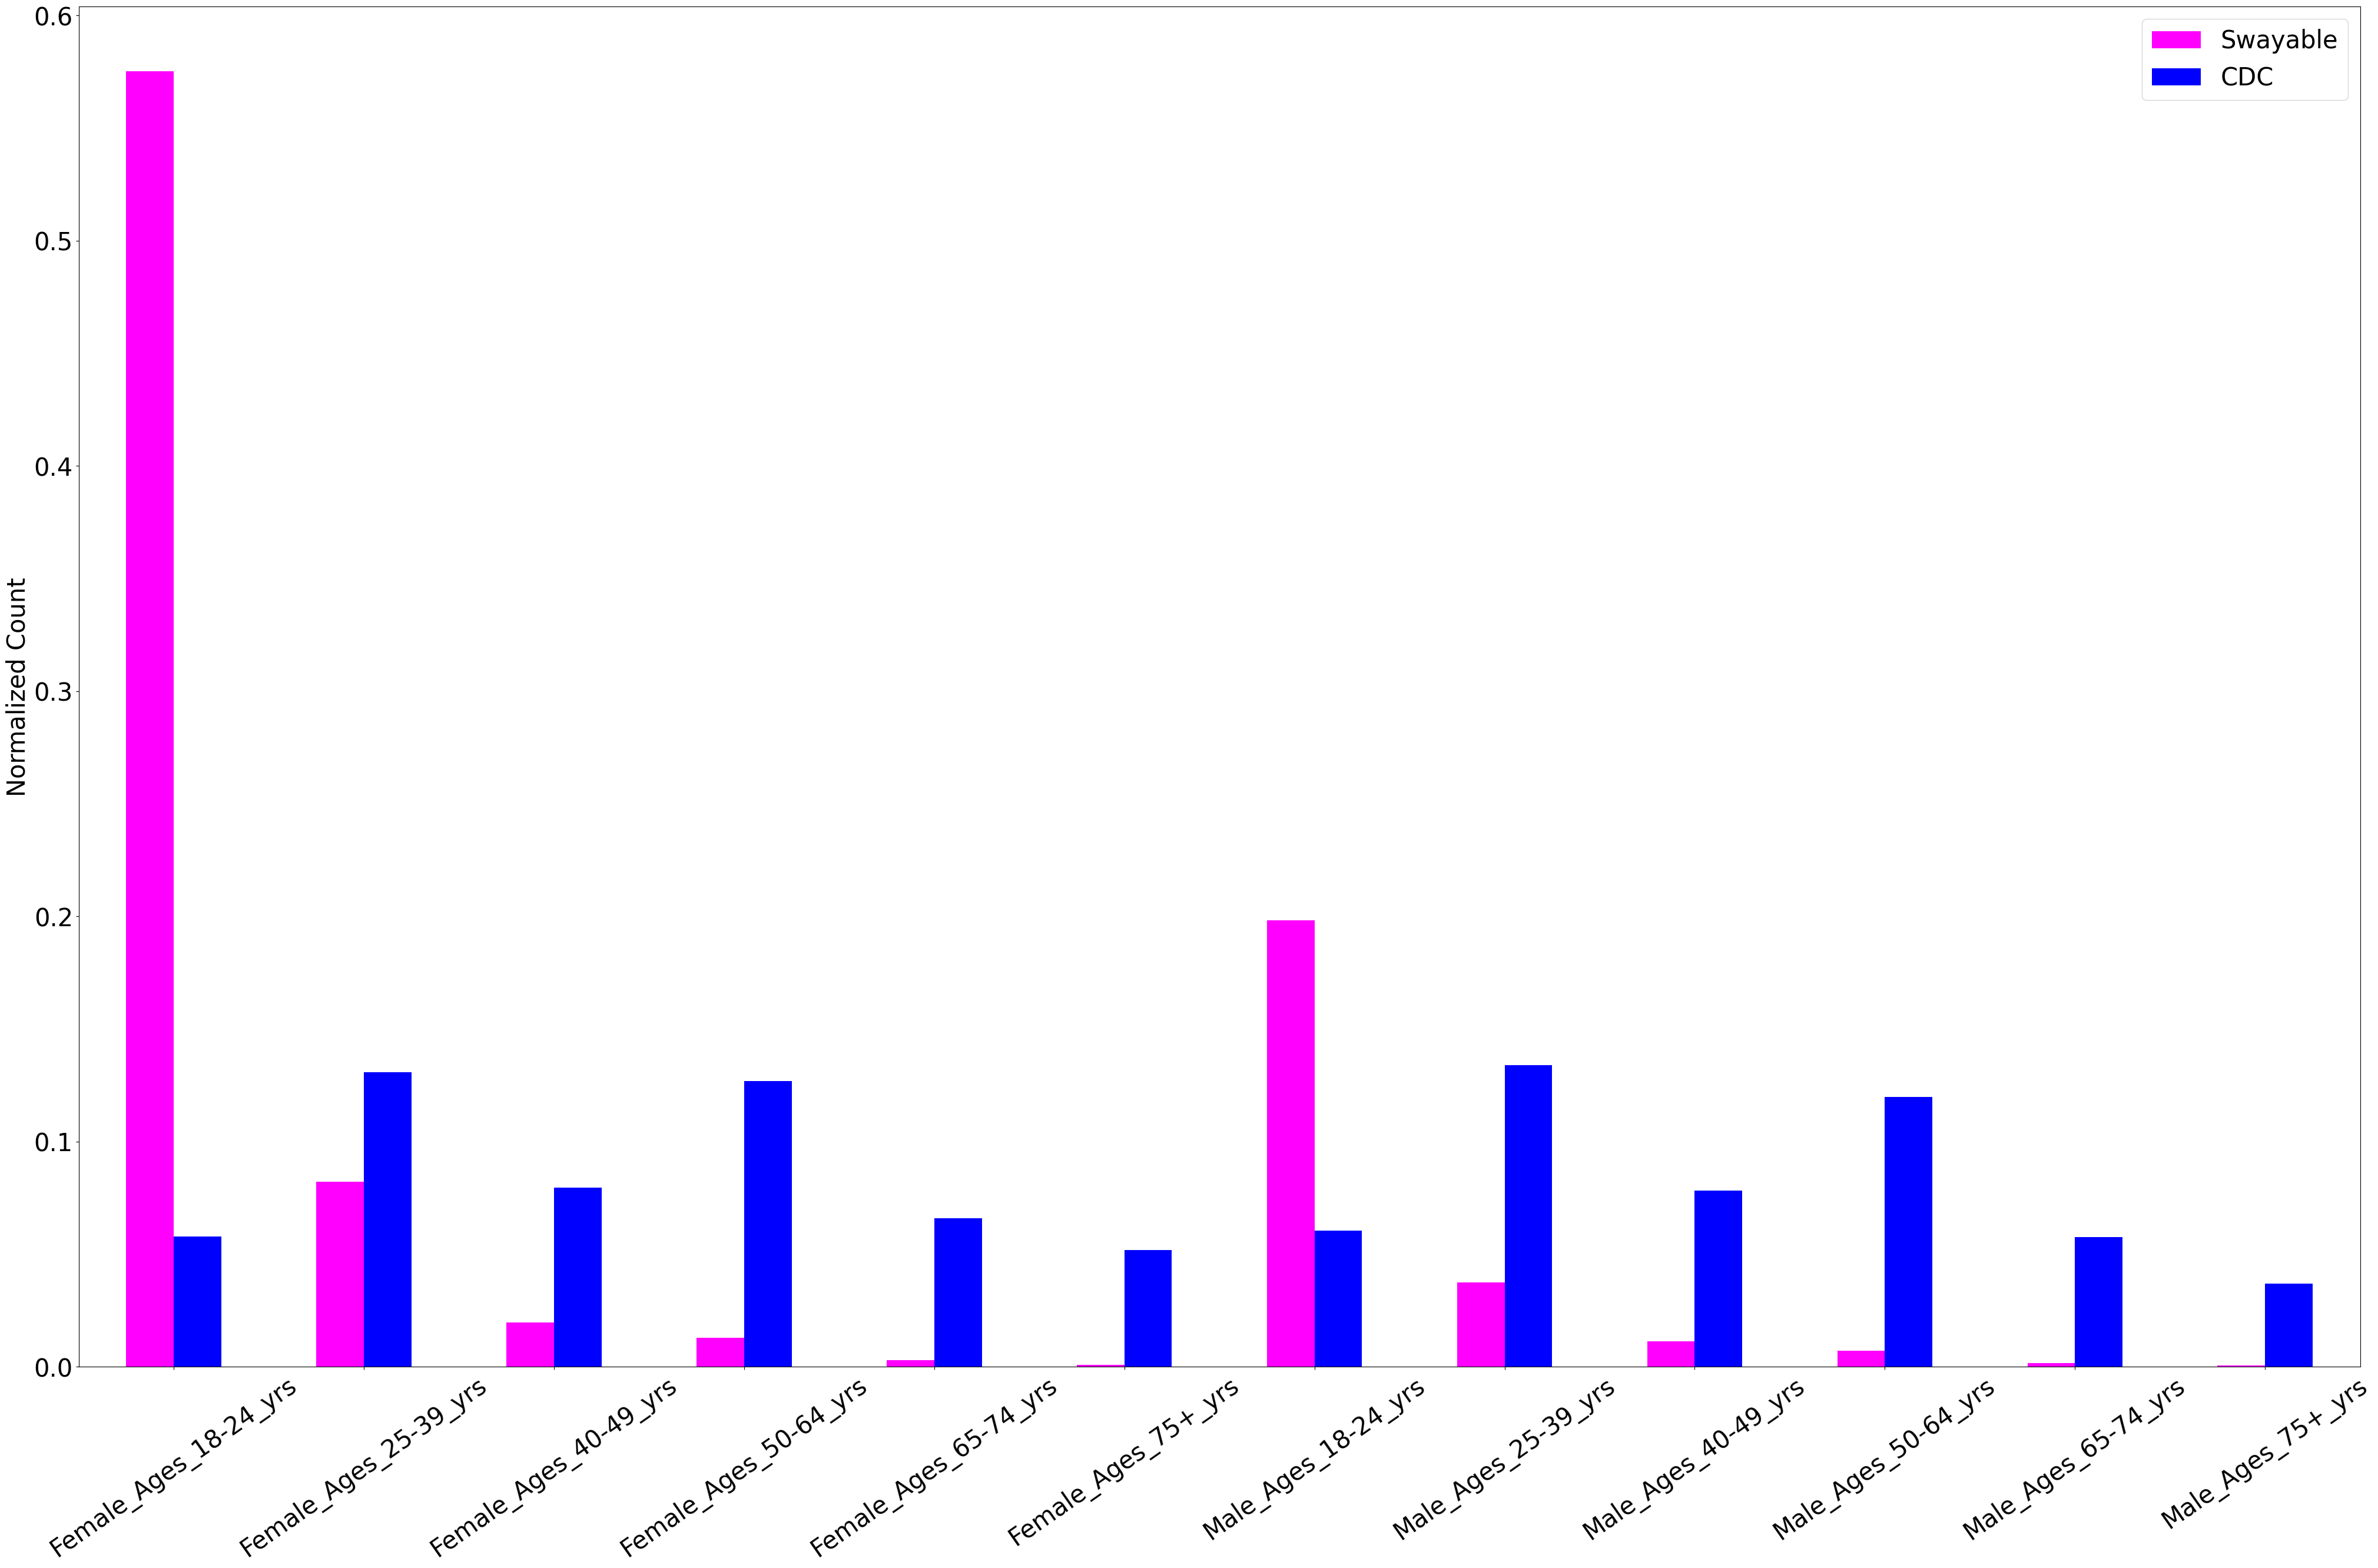

,Demographic_Category,Swayable,CDC
0,Female_Ages_18-24_yrs,0.575088,0.057885
1,Female_Ages_25-39_yrs,0.082141,0.130887
2,Female_Ages_40-49_yrs,0.019579,0.079672
3,Female_Ages_50-64_yrs,0.012904,0.126763
4,Female_Ages_65-74_yrs,0.002917,0.065854
5,Female_Ages_75+_yrs,0.000806,0.051868
6,Male_Ages_18-24_yrs,0.198308,0.060564
7,Male_Ages_25-39_yrs,0.037476,0.133963
8,Male_Ages_40-49_yrs,0.011394,0.078296
9,Male_Ages_50-64_yrs,0.007173,0.119774


In [19]:
#count how many participants for each demographic category in each year 
swybl_count = responses_df[['Date','Demographic_Category']]
swybl_count = swybl_count.groupby([ 'Demographic_Category']).size().reset_index()
swybl_count = swybl_count.rename(columns={0: 'count'})
#get percentage of count in dataset
total_swayable_count = swybl_count['count'].sum()
swybl_count['count']= swybl_count['count'] / total_swayable_count


cdc_count = groundtruth_df[['Demographic_Category','census']]
cdc_count= cdc_count.groupby(['Demographic_Category']).sum().reset_index()
cdc_count = cdc_count.rename(columns={'census': 'count'})
#getpercentage of count in dataset 
total_cdc_count = cdc_count['count'].sum()
cdc_count['count']= cdc_count['count'] / total_cdc_count


#merge  counts
all_counts = swybl_count.merge(cdc_count, on='Demographic_Category')
all_counts = all_counts.rename(columns={'count_x': 'Swayable','count_y':'CDC'})


#plot
#Bar Plot 
all_counts.plot(x='Demographic_Category', y=['Swayable','CDC'], kind='bar', figsize=(50, 30), color=['magenta', 'blue']) 
plt.tick_params(axis='x', which='both', bottom=True,
                top=False, labelbottom=True)

plt.tick_params(axis='y', right=False,
                left=True)

plt.xticks(rotation=35, fontsize=30)  # Increase font size of x-axis tick labels
plt.yticks(fontsize=30)  

# Adding labels and title to the plot
plt.ylabel('Normalized Count',fontsize=30)
plt.xlabel('')
#plt.title('Swayable vs CDC by Demographic Category')
plt.legend(fontsize=30)
plt.savefig("dem_catagories.png", transparent=True)


# Displaying the plot
plt.show()

all_counts


Here, I'm looking at the demographic categories. I can see that, compared to the sample size, Swayable has a lot more F and M in the 18-24 categories than any other category and is far more represented than the CDC data. There seems to be a somewhat proportional representation of F in the 25-39 category, but every other category seems to be under-represented when compared to the CDC data and to the Swayable data itself.

Notably, there are many demographic categories that have very very little data -- like people over the age of 75. Because of this, I will exclude the groups with two few data from the rest of my research here. I will use age ranges between 18-24 and 40-49

Because there is a lot of data in the 18-24 category and it's over-represented, I'll focus the rest of the time investigating that demographic and how this demographic relates to other questions in Swayable survey. 

### **3.2** CDC Vaccine Status' vs. Swayable Vaccine Status

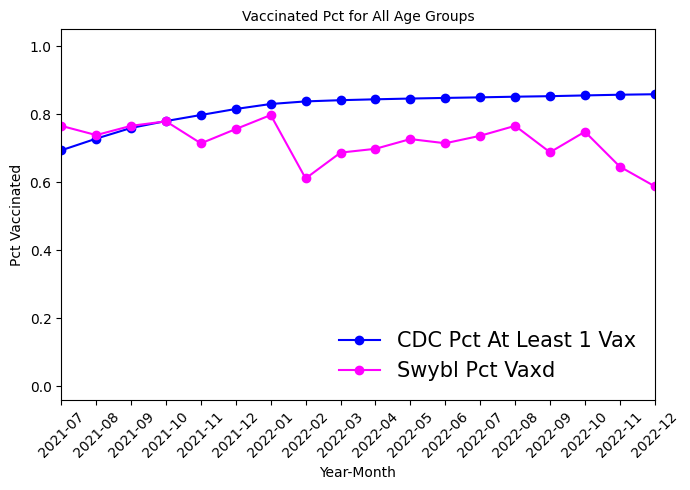

In [20]:
import matplotlib.dates as mdates

def vax_lineplot(cdc_1vax_df, avg_vax_pct_swybl, value, title, color='magenta', linestyle='-', marker='o', label='Swybl Pct Vaxd'):
    plt.figure(figsize=(7, 5))
    plt.plot(cdc_1vax_df['Date'], cdc_1vax_df[value], marker='o', label='CDC Pct At Least 1 Vax', color='blue')
    plt.plot(avg_vax_pct_swybl['Date'], avg_vax_pct_swybl[value], linestyle=linestyle, marker=marker, label=label, color=color)

    plt.legend(frameon=False, loc='lower right',fontsize=15)
    plt.xlabel('Year-Month', fontsize=10)  # Increase font size of x-axis label
    plt.ylabel('Pct Vaccinated', fontsize=10)  # Increase font size of y-axis label
    plt.title(title, fontsize=10)  # Increase font size of title
    plt.xticks(rotation=45, fontsize=10)  # Increase font size of x-axis tick labels
    plt.yticks(fontsize=10)  # Increase font size of y-axis tick labels
    plt.xlim('2021-07', '2022-12')  # Limit plot to where swayable data is present
    plt.tight_layout()
    #plt.savefig(title + '.png', transparent=True)


vax_lineplot(cdc_1vax_df,avg_vax_pct_swybl,'Avg_All_Demographics','Vaccinated Pct for All Age Groups') 



### 3.3 Explore how the overall percentage of vaccinations is affected when I remove the 18-24 age demographics 

In [21]:
def drop1824(df):
    drop1824 = df.drop(columns=['Female_Ages_18-24_yrs','Male_Ages_18-24_yrs','Avg_All_Demographics'])
    #recalculate avg for all demographics wihtout  the 18-24 age range
    drop1824['Avg_All_Demographics'] = drop1824.iloc[:, 1:].mean(axis=1) 

    return drop1824

    
cdc_1vax_df 
avg_vax_pct_swybl

cdc_1vax_drop1824 = drop1824(cdc_1vax_df)
swybl_vax_drop1824 = drop1824(avg_vax_pct_swybl)
#cdc_1vax_drop1824

Plot for the percent of vaccinated people for all demographic categories except 18-24 age ranges. 

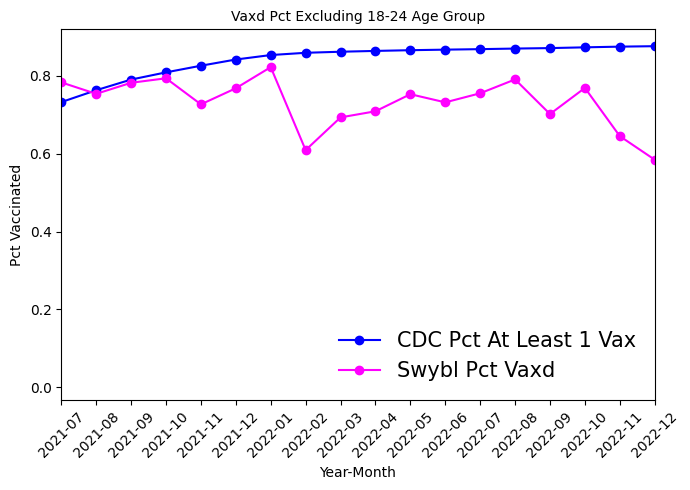

In [22]:
vax_lineplot(cdc_1vax_drop1824,swybl_vax_drop1824,'Avg_All_Demographics','Vaxd Pct Excluding 18-24 Age Group') 

In [23]:
print ('cdc pct vax all time: ',np.mean(cdc_1vax_drop1824[8:]['Avg_All_Demographics']) ) 
print('actual swayable vax all time: ',np.mean(swybl_vax_drop1824[9:]['Avg_All_Demographics']) ) 

cdc pct vax all time:  0.8489102268380471
actual swayable vax all time:  0.7285373948488657


Removing this overepresented age-range doesn't do too much to make the plot better... It simply lowers the percent of people vaccinated about equally for all dates just like CDC data does. I need to look elsewhere to find out where ther'es still a desrepancy between the CDC and Swayable data.

### 3.4 Looking at other survey questions that look over reprsented in the Swayable Survey 

The weights already account for age,gender,ethnicity,education, and urbancity. 

In [24]:

Q1 = responses_df['AnnualHouseholdIncome'].quantile(0.05)
Q3 = responses_df['AnnualHouseholdIncome'].quantile(0.95)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataframe to exclude outliers
filtered_responses_df = responses_df[(responses_df['AnnualHouseholdIncome'] >= lower_bound) & (responses_df['AnnualHouseholdIncome'] <= upper_bound)]

# Print the filtered dataframe
filtered_df


# for i in responses_df.columns.tolist():
#     sns.histplot(data=filtered_responses_df,x=i,bins=5,stat='count')
#     plt.title('Counts of ' + i)
#     plt.xticks(rotation=45)
#     plt.show()


,_id,startTime,endTime,weight,ZipCode,Gender,Religion_Alt1,Education_Alt2,AnnualHouseholdIncome,Religiosity_Alt2,...,calculatedFields.postalcodeEthnicityProportionNative,calculatedFields.postalcodeEthnicityProportionOther,calculatedFields.postalcodeEthnicityProportionPacific,calculatedFields.postalcodeEthnicityProportionWhiteNonHispanic,calculatedFields.postalcodeSexDiversity,calculatedFields.postalcodeSexProportionFemale,calculatedFields.postalcodeSexProportionMale,calculatedFields.postalcodeUrbanization,calculatedFields.state,calculatedFields.urbanization
0,5fadb3a99b4fb100333792b0,2020-11-12 22:09:43.864,2020-11-12 22:14:01.179,1.973157,90001,male,nothing-in-particular,college,150000.0,0.0,...,0.008212,0.611533,0.000222,0.006492,0.999721,0.509830,0.490170,1.0,CA,Large City
1,5fadb56a19ba4c001e0fc37a,2020-11-12 22:16:11.386,2020-11-12 22:21:30.946,1.973157,11763,female,catholic,highschool,NaN,7.2,...,0.000456,0.013931,NaN,0.633926,0.997530,0.529249,0.470751,1.0,NY,Suburban
2,5fadb6887de2b300279d4900,2020-11-12 22:23:12.210,2020-11-12 22:26:16.535,0.047266,08876,female,atheist,school,NaN,5.3,...,0.000991,0.031944,NaN,0.696914,0.999903,0.505790,0.494210,1.0,NJ,Suburban
3,5fadb887b56023002ea2d328,2020-11-12 22:28:40.338,2020-11-12 22:34:47.545,1.973157,43235,male,atheist,college,65.0,0.0,...,0.001071,0.024688,NaN,0.762314,0.998300,0.524271,0.475729,1.0,OH,Large City
4,5fadb888aa11b2001dff5a89,2020-11-12 22:32:08.374,2020-11-12 22:34:48.601,1.973157,95616,female,mormon,some-college,200000.0,7.6,...,0.001278,0.047495,0.002437,0.527063,0.995148,0.540984,0.459016,1.0,CA,Suburban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86482,63b083abeefc510046d6fb4c,2022-12-31 18:43:15.721,2022-12-31 18:47:07.200,1.463021,62901,male,nothing-in-particular,school,NaN,4.8,...,0.001546,0.019046,0.000000,0.608750,0.999984,0.497643,0.502357,3.0,IL,Small City
86484,63b0987053af540037336976,2022-12-31 20:07:26.724,2022-12-31 20:15:44.328,1.973157,6804,male,nothing-in-particular,college,NaN,6.4,...,0.000000,0.011182,0.001165,0.857892,0.999995,0.501340,0.498660,2.0,CT,Small City
86485,63b09dba873424003add4654,2022-12-31 20:32:49.334,2022-12-31 20:38:18.786,1.973157,46723,female,catholic,college,NaN,10.0,...,0.000000,0.005264,0.000000,0.975128,0.999563,0.512304,0.487696,2.0,IN,Small City
86486,63b0a6f57529ff003b0e14e8,2022-12-31 21:12:16.003,2022-12-31 21:17:41.898,0.187162,36027,female,nothing-in-particular,highschool,1000.0,0.0,...,0.001794,0.048248,0.000000,0.453258,0.999556,0.512398,0.487602,6.0,AL,Rural


### 3.4.1 Looking at Religon 
It looks like there's a high proportion of people surveyed that are not religous or not affiliated -- more so than the general population. On the other hand, there are very few protistants and evangelicals represented. I will duplicate some of those rows here to better represent the actual american population.

The CDC doesn't have the averages of religion among these people, but Pew Research Center does: https://www.pewresearch.org/religion/religious-landscape-study/ 

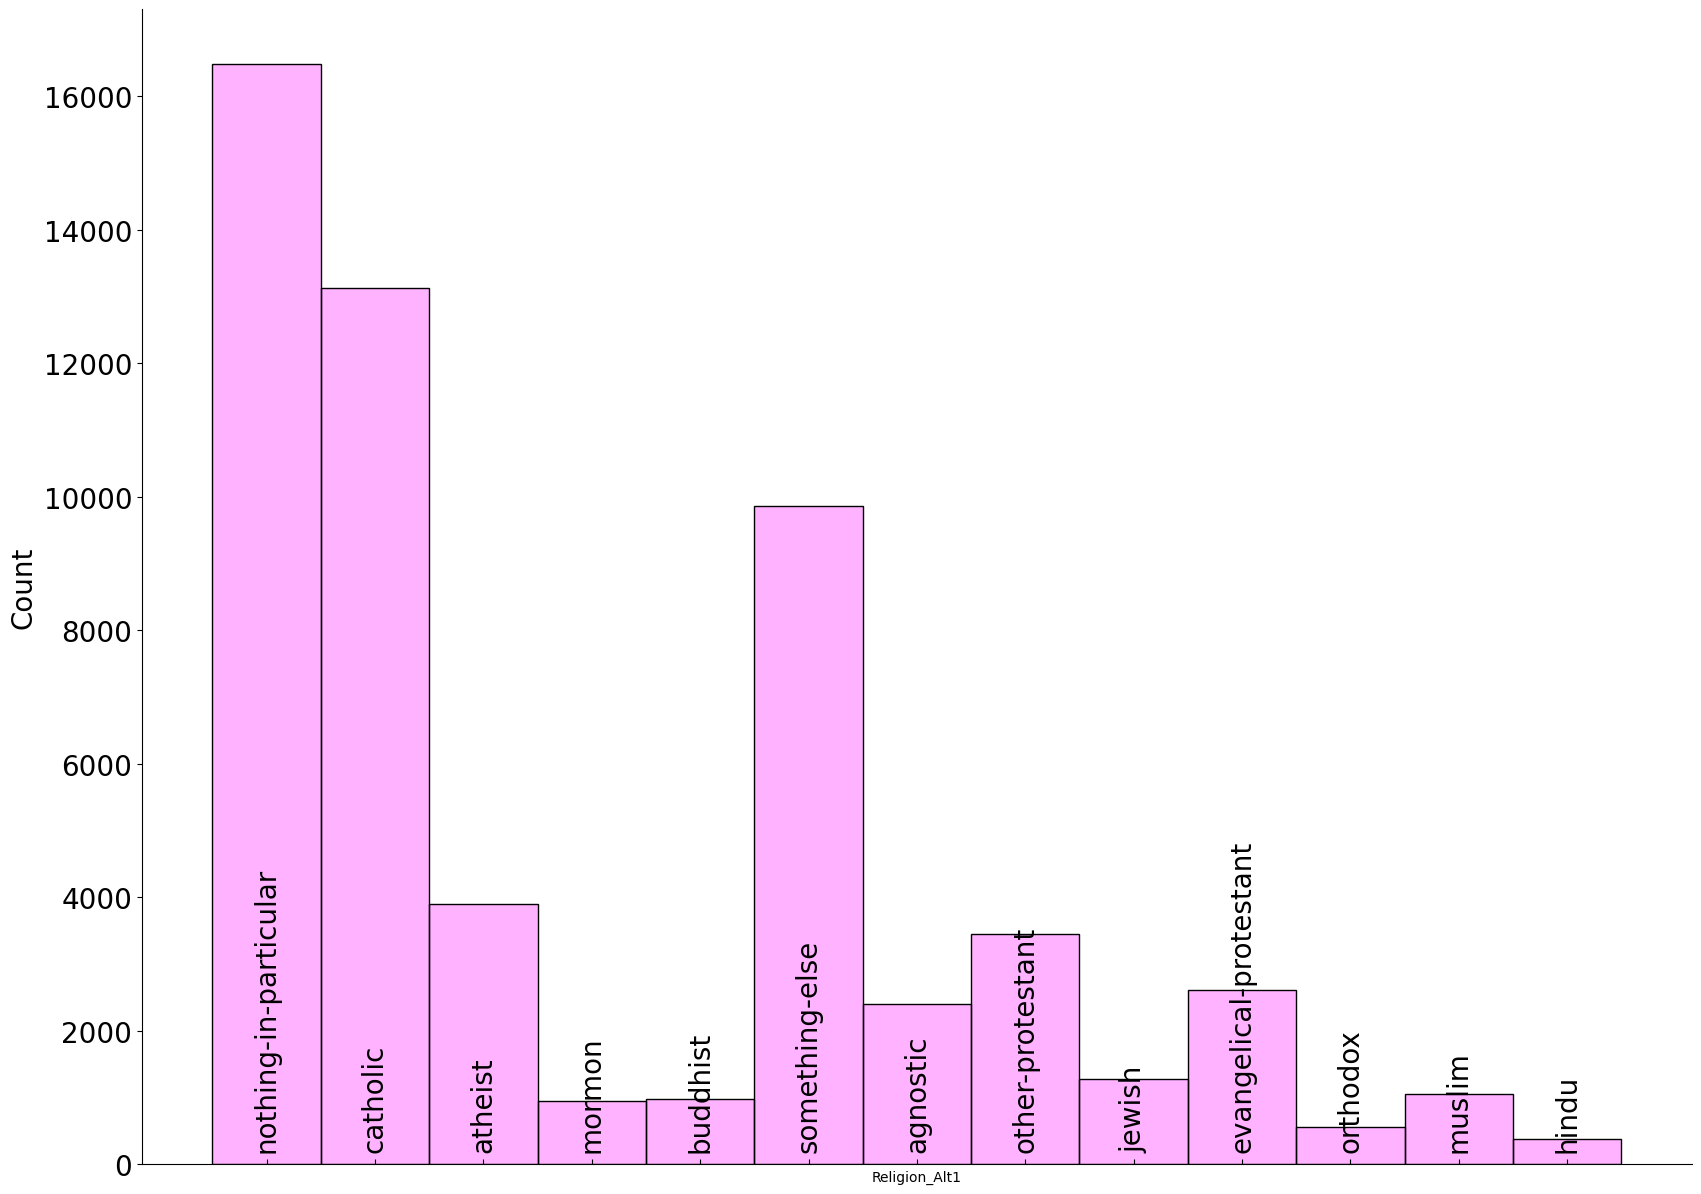

In [25]:
plt.figure(figsize=(20, 15))
ax = sns.histplot(data=filtered_responses_df, x='Religion_Alt1', stat='count',color='magenta',alpha=.3)
ax.tick_params(axis="x",direction="in", pad=-823,labeltop=True,labelbottom=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
#plt.xlabel('Religion', fontsize=20)
plt.ylabel('Count', fontsize=20)
#plt.title('Density of Religion', fontsize=18)
plt.savefig('Religion', transparent=True)
plt.show()


In [26]:
def get_religion_percentages(df):
    religions = df['Religion_Alt1'].unique().tolist()
    current_percentages = {}

    for religion in religions:
        religion_rows = df[df['Religion_Alt1'] == religion]
        current_percentage = len(religion_rows) / len(df)
        current_percentages[religion] = current_percentage

    # Print the current percentages
    religion_pct=[]
    for religion, percentage in current_percentages.items():
        religion_pct.append(f"{religion}: {percentage}")
    return pd.DataFrame(religion_pct).reset_index(drop=True)

In [27]:
def add_duplicated_rows(df, religion_rows, target_percentage, duplicates_factor):
    current_percentage = len(religion_rows) / len(df)
    rows_to_add = max(0, int((target_percentage - current_percentage) * len(df)))
    random_rows = religion_rows.sample(rows_to_add, replace=True)
    duplicated_rows = pd.concat([random_rows] * duplicates_factor, ignore_index=True)
    return pd.concat([df, duplicated_rows], ignore_index=True)

def optimize_religion_dataframe(df):
    target_percentages = {
        'evangelical-protestant': 0.25,
        'other-protestant': 0.21,
        'catholic':.2
}
    duplicates_factors = {
        'evangelical-protestant': 2,
        'other-protestant':2,
        'catholic':1
}

    for religion, target_percentage in target_percentages.items():
        religion_rows = df[df['Religion_Alt1'] == religion]
        duplicates_factor = duplicates_factors[religion]
        df = add_duplicated_rows(df, religion_rows, target_percentage, duplicates_factor)

    return pd.DataFrame(df) 

# Call the function to optimize the religion dataframe
filtered_religion_df = optimize_religion_dataframe(responses_df)

# Print the resulting dataframe
get_religion_percentages(filtered_religion_df)

,0
0,nothing-in-particular: 0.1421897785464781
1,catholic: 0.18559873842710348
2,atheist: 0.033760640282158236
3,mormon: 0.008452877539254586
4,buddhist: 0.008554617288974803
5,something-else: 0.08524095364058738
6,agnostic: 0.02072099569301726
7,other-protestant: 0.26229355309119273
8,jewish: 0.011293112218943942
9,evangelical-protestant: 0.22425136500830875


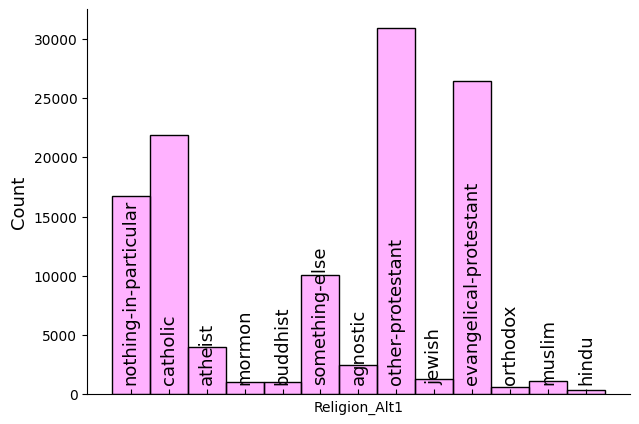

In [28]:
plt.figure(figsize=(7, 5))
ax = sns.histplot(data=filtered_religion_df, x='Religion_Alt1', stat='count', color='magenta', alpha=.3)

ax.tick_params(axis="x", direction="in", pad=-270, labeltop=True, labelbottom=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xticks(fontsize=13, rotation=90)
plt.yticks(fontsize=10)
plt.ylabel('Count', fontsize=13)
plt.savefig('Religion_modified', transparent=True)
plt.show()

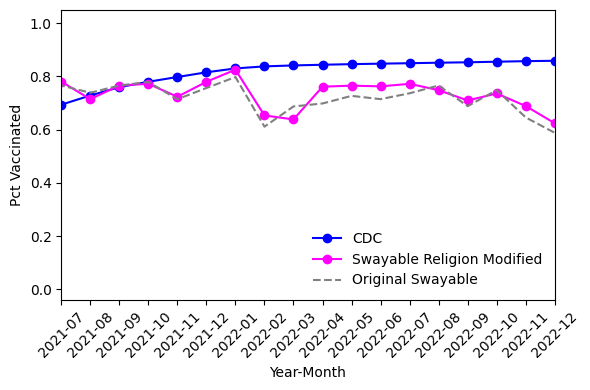

In [29]:
pivot_swybl_filtered_religion =  pivot(filtered_religion_df,'ReceivedCovidVaccine','mean')

def plot_compare(comparison_df,comparison_label,png_name): 
    plt.figure(figsize=(6, 4))
    plt.plot(cdc_1vax_df['Date'], cdc_1vax_df['Avg_All_Demographics'], marker='o', label='CDC', color='blue')
    plt.plot(comparison_df['Date'], comparison_df['Avg_All_Demographics'], marker='o', label=comparison_label, color='magenta')
    plt.plot(avg_vax_pct_swybl['Date'], avg_vax_pct_swybl['Avg_All_Demographics'], linestyle='--', label='Original Swayable', color='Grey')

    plt.legend(frameon=False, loc='lower right',fontsize=10)
    plt.xlabel('Year-Month', fontsize=10)  # Increase font size of x-axis label
    plt.ylabel('Pct Vaccinated', fontsize=10)  # Increase font size of y-axis label
    #plt.title(title, fontsize=14)  # Increase font size of title
    plt.xticks(rotation=45, fontsize=10)  # Increase font size of x-axis tick labels
    plt.yticks(fontsize=10)  # Increase font size of y-axis tick labels
    plt.xlim('2021-07', '2022-12')  # Limit plot to where swayable data is present
    plt.tight_layout()
    plt.savefig(png_name+'.png', transparent=True)
    plt.show()

plot_compare(pivot_swybl_filtered_religion,'Swayable Religion Modified','Modified Relgion Pct Vaccinated for All Demographic Categories') 



In [31]:
dems = ['Avg_All_Demographics','Female_Ages_18-24_yrs','Male_Ages_18-24_yrs']
for i in dems:
    print(i)
    print('--')
    print ('CDC pct vax               |  ',np.mean(cdc_1vax_df[8:][i]) ) 
    print ('Swayable vax              |  ',np.mean(avg_vax_pct_swybl[9:][i]) ) 
    print ('Filtered Swayable pct vax |  ',np.mean(pivot_swybl_filtered_religion[9:][i]) ) 
    print('__________________________________________________________________________________')

Avg_All_Demographics
--
CDC pct vax               |   0.826676848651647
Swayable vax              |   0.7155396313257962
Filtered Swayable pct vax |   0.7318733560861462
__________________________________________________________________________________
Female_Ages_18-24_yrs
--
CDC pct vax               |   0.7561932236980813
Swayable vax              |   0.6335333165492733
Filtered Swayable pct vax |   0.6447324568172695
__________________________________________________________________________________
Male_Ages_18-24_yrs
--
CDC pct vax               |   0.6748266917412126
Swayable vax              |   0.6329195738732772
Filtered Swayable pct vax |   0.6216056846270244
__________________________________________________________________________________


"Correcting" for religion by duplicating some surveys taken to include a more representive population of christians seemed to marginally help. It raises the average mean of the percent of people who got vaxed in the Swayable data to about 1.5%. Now, **instead of coming within 11%** of the average cdc mean, **the Swayable data comes within 9.5%.**

The same seems to be somewhat true for the 18-24 age range except for the men in this age range.

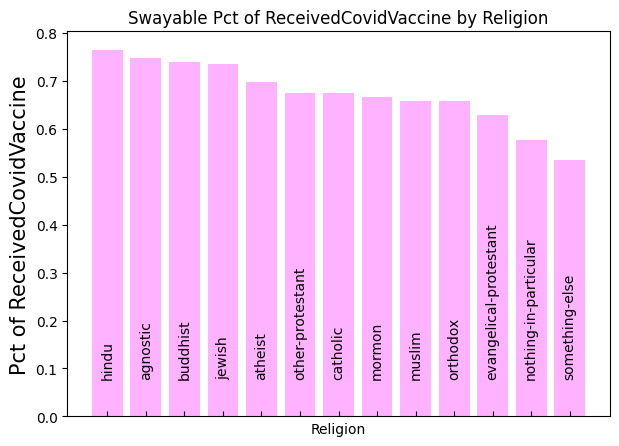

In [ ]:
# Calculate the sum of 'ReceivedCovidVaccine' and the count of each category in 'Religion_Alt1'
grouped_df = responses_df.groupby('Religion_Alt1')['ReceivedCovidVaccine'].agg(['sum', 'count'])

# Calculate the ratio by dividing the sum by the count
grouped_df['ratio'] = grouped_df['sum'] / grouped_df['count']

# Sort the dataframe by the 'ratio' column in descending order
grouped_df.sort_values('ratio', ascending=False, inplace=True)

# Create the bar plot
plt.figure(figsize=(7, 5))
plt.bar(grouped_df.index, grouped_df['ratio'],color='magenta',alpha=.3)

plt.tick_params(axis="x", direction="in", pad=-250, labeltop=True, labelbottom=False)
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)
# Set the labels and title
plt.xlabel('Religion')
plt.ylabel('Pct of ReceivedCovidVaccine',fontsize=15)
plt.title('Swayable Pct of ReceivedCovidVaccine by Religion')
plt.xticks(rotation=90)
plt.savefig('CovidVaccinePercent.png', transparent=True)


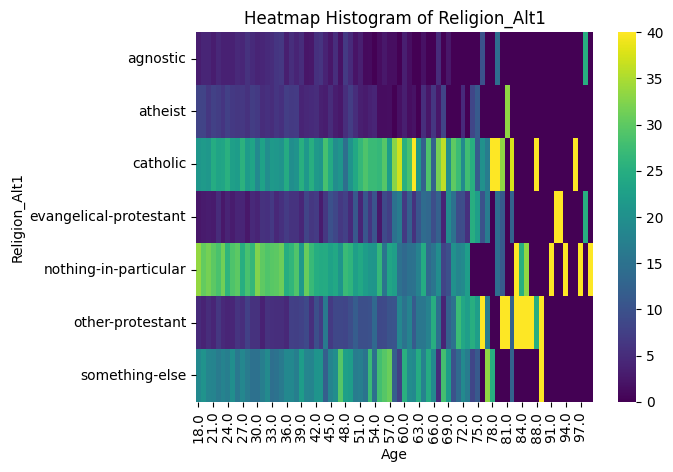

Age,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,60.0,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0,73.0,74.0,75.0,76.0,77.0,78.0,79.0,80.0,81.0,82.0,83.0,84.0,85.0,87.0,88.0,89.0,90.0,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0
Religion_Alt1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
agnostic,3.15,4.16,4.17,3.20,4.51,3.65,3.66,3.62,4.56,4.28,5.63,4.84,4.03,4.27,4.81,5.14,6.10,6.43,3.33,5.23,4.04,5.05,2.22,2.54,5.50,6.09,3.80,2.48,5.19,1.96,6.77,4.72,2.17,3.42,0.96,1.23,0.00,1.27,2.56,1.47,1.49,0.00,3.39,1.49,0.00,0.00,1.75,0.00,0.00,4.88,0.0,2.44,0.0,0.00,0.00,0.00,0.00,0.00,10.0,0.00,0.0,14.29,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0
atheist,8.00,8.09,6.29,7.68,7.04,6.15,7.61,6.59,6.33,6.50,5.63,7.16,6.57,5.06,5.49,5.14,6.10,5.56,7.22,6.86,6.99,3.97,4.44,4.76,5.05,3.55,3.26,4.97,3.25,2.61,5.26,7.09,5.07,3.42,2.88,3.70,4.17,1.27,1.28,1.47,0.00,1.85,3.39,1.49,1.89,0.00,5.26,2.22,6.25,2.44,8.0,0.00,0.0,0.00,4.76,0.00,8.33,11.11,0.0,0.00,0.0,0.00,0.00,33.33,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
catholic,21.04,21.65,21.14,24.65,23.14,23.52,25.40,22.39,21.89,25.55,21.78,23.37,18.86,23.10,19.45,21.45,21.22,20.47,24.44,19.61,20.59,25.27,21.33,25.08,21.56,20.81,28.26,24.22,19.48,20.92,14.29,20.47,23.91,26.71,28.85,27.16,27.08,26.58,29.49,22.06,32.84,37.04,25.42,28.36,41.51,21.05,12.28,28.89,12.50,31.71,36.0,19.51,30.0,27.27,19.05,27.78,25.00,11.11,20.0,16.67,75.0,57.14,33.33,0.00,37.5,0.0,0.0,0.00,0.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0
evangelical-protestant,2.44,2.95,3.20,2.82,4.99,2.64,3.95,3.07,4.11,4.14,2.54,4.63,4.03,5.70,5.49,6.65,4.51,5.56,6.94,5.88,5.88,4.33,8.00,6.35,6.88,3.05,6.52,9.94,8.44,6.54,7.52,4.72,10.87,4.11,10.58,6.17,10.42,2.53,8.97,7.35,14.93,16.67,6.78,11.94,5.66,10.53,14.04,13.33,9.38,12.20,4.0,19.51,15.0,9.09,9.52,5.56,25.00,22.22,10.0,16.67,0.0,14.29,11.11,0.00,12.5,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,0.0,0.0,25.0,0.0
nothing-in-particular,33.49,30.39,31.71,29.98,28.59,31.31,26.09,28.87,29.89,25.11,28.31,26.53,32.20,30.06,29.06,29.61,29.97,30.99,24.72,26.14,29.04,21.30,30.67,26.98,24.77,24.37,24.46,22.98,24.03,20.92,27.07,25.98,22.46,23.97,22.12,20.99,20.83,26.58,15.38,23.53,22.39,14.81,13.56,14.93,15.09,17.54,24.56,13.33,15.62,19.51,8.0,9.76,20.0,18.18,19.05,22.22,0.00,0.00,0.0,0.00,0.0,14.29,11.11,0.00,0.0,50.0,25.0,33.33,0.0,0.0,0.0,0.0,100.0,0.0,0.0,100.0,0.0,0.0,100.0,0.0,100.0
other-protestant,4.71,3.79,5.15,4.17,6.31,4.65,4.15,4.28,6.00,5.17,7.62,5.68,5.72,3.64,5.72,5.44,5.31,5.26,4.44,7.52,7.35,7.94,8.89,5.40,9.63,7.11,16.30,6.83,8.44,8.50,8.27,9.45,11.59,9.59,9.62,9.88,13.54,8.86,8.97,10.29,10.45,18.52,15.25,17.91,11.32,15.79,15.79,17.78,25.00,14.63,4.0,12.20,15.0,27.27,23.81,22.22,25.00,22.22,50.0,16.67,0.0,0.00,44.44,66.67,12.5,50.0,50.0,66.67,100.0,25.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
something-else,18.86,20.52,18.21,17.99,16.52,17.94,16.90,19.54,16.00,18.46,16.52,14.74,14.83,16.93,18.99,14.50,15.12,16.37,18.61,18.63,16.91,22.02,18.22,18.10,20.64,20.81,11.96,18.01,19.48,29.41,22.56,22.05,16.67,17.12,15.38,27.16,14.58,27.85,29.49,30.88,11.94,7.41,25.42,19.40,18.87,24.56,17.54,24.44,18.75,4.88,28.0,21.95,10.0,13.64,19.05,16.67,8.33,11.11,0.0,33.33,25.0,0.00,0.00,0.00,12.5,0.0,0.0,0.00,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
religion_grouped_df = responses_df.groupby('Age')['Religion_Alt1'].value_counts().rename('count').reset_index()


# Pivot the DataFrame to make Religion_Alt1 categories as columns
pivoted_df = religion_grouped_df.pivot_table(values='count', index='Religion_Alt1', columns='Age')
# Calculate the sum of counts for each age
sum_by_age = pivoted_df.sum()

# Divide each count by the sum for that age and multiply by 100 to get percentages
percentage_df = pivoted_df.div(sum_by_age) * 100

religions = ['agnostic', 'atheist', 'catholic', 'evangelical-protestant',
                  'nothing-in-particular', 'other-protestant', 'something-else']

# Round the percentages to 2 decimal places
pivoted_df = percentage_df.round(2).loc[pivoted_df.index.isin(religions)].fillna(0)




# Create the heatmap
sns.heatmap(pivoted_df, cmap='viridis', yticklabels=pivoted_df.index.tolist(),vmax=40)

# Set the axis labels and plot title
plt.xlabel('Age')
plt.ylabel('Religion_Alt1')

plt.title('Heatmap Histogram of Religion_Alt1')

# Display the plot
plt.show()

pivoted_df

### 3.4.2 Voting Frequency 

In [ ]:
#function to filter scalable survey questions (if you want to remove some row based on the value in certain columns)
def filter_scale(value,lower_bound,upper_bound,remove_pct): 
    # Set the random seed to remove rows randomly 
    np.random.seed(42)

    # Filter rows based on the condition
    mask = (responses_df[value] < lower_bound) | (responses_df[value] > upper_bound)

    filtered_df = responses_df[mask]

    # Calculate the number of rows to remove
    num_rows_to_remove = int(len(filtered_df) * remove_pct)

    # Get the indices of rows to remove
    indices_to_remove = np.random.choice(filtered_df.index, size=num_rows_to_remove, replace=False)

    # Remove the rows from the DataFrame
    return filtered_df.drop(indices_to_remove)

In [ ]:
#function that compares the true data with the filtered scalable data. 
def compare_true_and_filtered(value,lower_bound,upper_bound,remove_pct,comparison_label,png_name): 

    #create filtered data
    swybl_filtered = filter_scale(value,lower_bound,upper_bound,remove_pct)
    #pivot table
    pivot_swybl_filtered =  pivot(swybl_filtered,'ReceivedCovidVaccine','mean')
    #plot
    plot_compare(pivot_swybl_filtered,comparison_label,png_name) 

    #print stats
    dems = ['Avg_All_Demographics','Female_Ages_18-24_yrs','Male_Ages_18-24_yrs']

    for i in dems:
        print(i)
        print('--')
        print ('CDC pct vax               |  ',np.mean(cdc_1vax_df[8:][i]) ) 
        print ('Swayable vax              |  ',np.mean(avg_vax_pct_swybl[9:][i]) ) 
        print ('Filtered Swayable pct vax |  ',np.mean(pivot_swybl_filtered[9:][i]) ) 
        print('__________________________________________________________________________________')


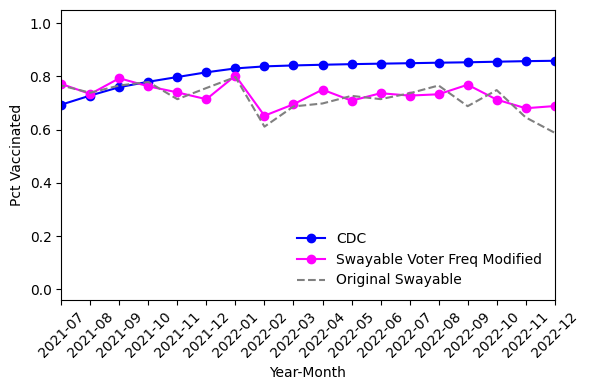

Avg_All_Demographics
--
CDC pct vax               |   0.826676848651647
Swayable vax              |   0.7155396313257962
Filtered Swayable pct vax |   0.729578657846477
__________________________________________________________________________________
Female_Ages_18-24_yrs
--
CDC pct vax               |   0.7561932236980813
Swayable vax              |   0.6335333165492733
Filtered Swayable pct vax |   0.6436198922103807
__________________________________________________________________________________
Male_Ages_18-24_yrs
--
CDC pct vax               |   0.6748266917412126
Swayable vax              |   0.6329195738732772
Filtered Swayable pct vax |   0.6458075547414147
__________________________________________________________________________________


In [ ]:
#Comparing Voting Frequency where I remove 25% of rows where voter frequency was between 3.8 and 5.8
compare_true_and_filtered('VotingFrequencyNoOp',
                          3.8,5.8,0.25,
                          'Swayable Voter Freq Modified',
                          'Modified Voter Freq Pct Vaccinated for All Demographic Categories.png')

<Axes: xlabel='VotingFrequencyNoOp', ylabel='Count'>

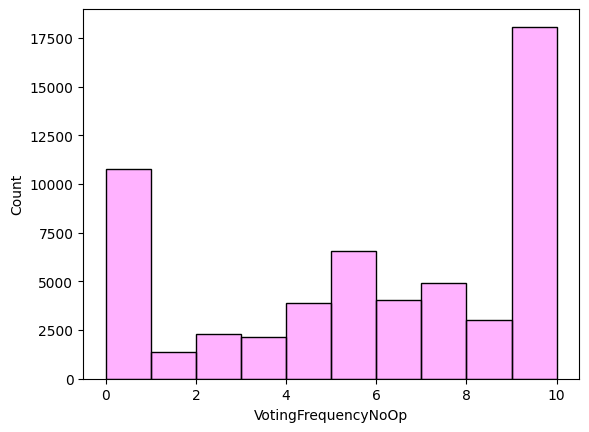

In [ ]:
sns.histplot(data=filtered_responses_df,x='VotingFrequencyNoOp',bins=10,stat='count',color='magenta',alpha=.3)

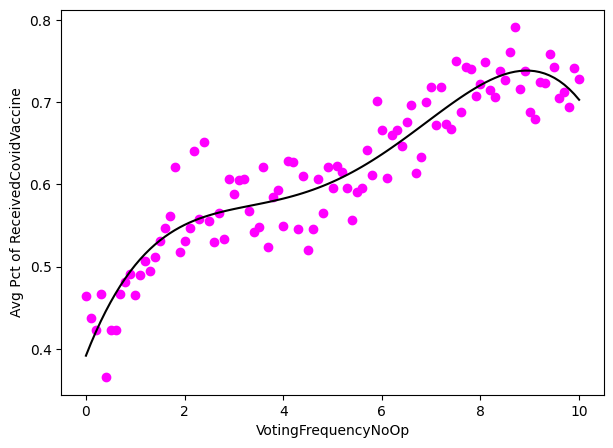

58278

In [ ]:
# Calculate the sum of 'ReceivedCovidVaccine' and the count of each category in 'Religion_Alt1'
def poly_fit_plot(value,value2,polyfit_plot):
    grouped_df = responses_df.groupby(value)[value2].agg(['mean', 'count'])

    plt.figure(figsize=(7,5))

    # Scatter plot
    plt.scatter(grouped_df.index, grouped_df['mean'], color='magenta')

    if polyfit_plot == True:
        # Polynomial fit
        coefficients = np.polyfit(grouped_df.index, grouped_df['mean'], 4)  # Fit a polynomial of degree 2
        polynomial = np.poly1d(coefficients)
        x_values = np.unique(grouped_df.index)
        y_values = polynomial(x_values)
        plt.plot(x_values, y_values, color='black')

    plt.xlabel(value)
    plt.ylabel('Avg Pct of ' + value2)
    plt.show()
    

poly_fit_plot('VotingFrequencyNoOp','ReceivedCovidVaccine',polyfit_plot=True)

responses_df['A']

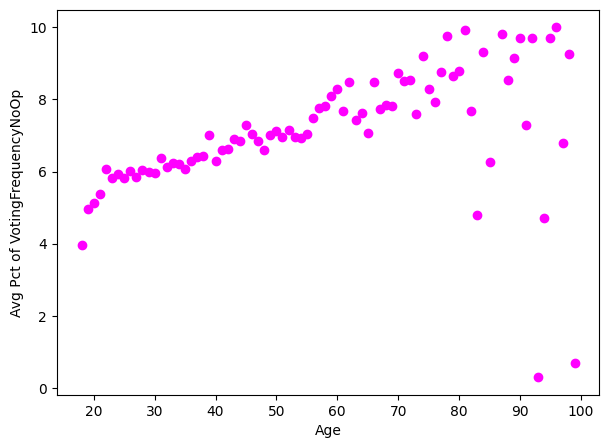

In [ ]:
poly_fit_plot('Age','VotingFrequencyNoOp',polyfit_plot=False)

### 3.4.3 Political Beliefs

<Axes: xlabel='PoliticalBeliefsNoOp', ylabel='Count'>

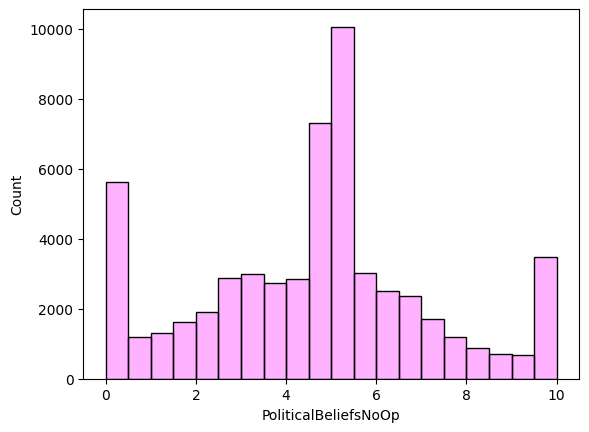

In [ ]:
sns.histplot(data=filtered_responses_df,x='PoliticalBeliefsNoOp',bins=20,stat='count',color='magenta',alpha=.3)

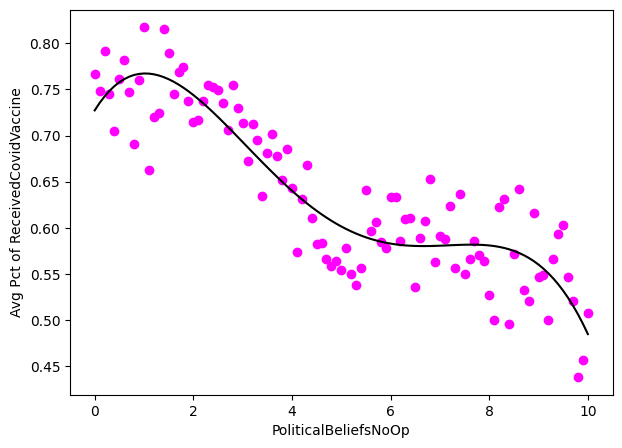

In [ ]:
poly_fit_plot('PoliticalBeliefsNoOp','ReceivedCovidVaccine',polyfit_plot=True)

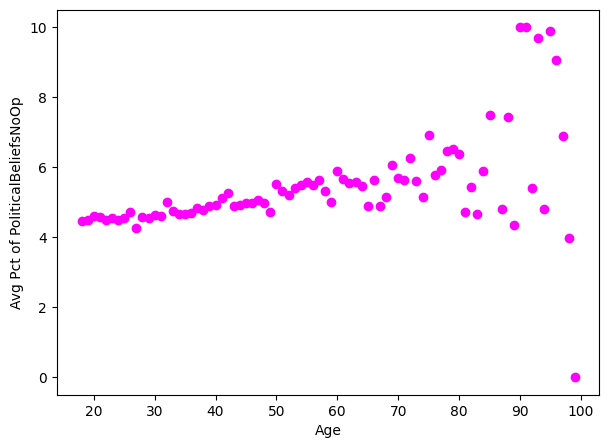

In [ ]:
poly_fit_plot('Age','PoliticalBeliefsNoOp',polyfit_plot=False)

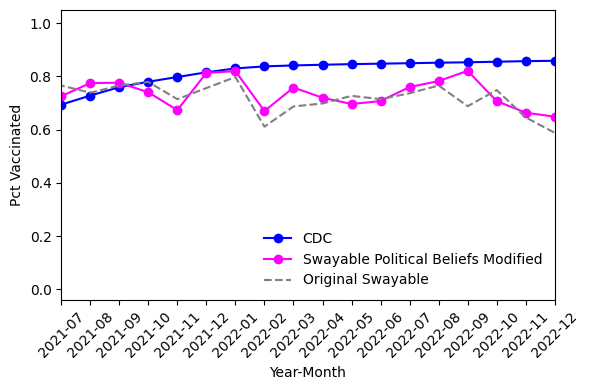

Avg_All_Demographics
--
CDC pct vax               |   0.826676848651647
Swayable vax              |   0.7155396313257962
Filtered Swayable pct vax |   0.7372765495277998
__________________________________________________________________________________
Female_Ages_18-24_yrs
--
CDC pct vax               |   0.7561932236980813
Swayable vax              |   0.6335333165492733
Filtered Swayable pct vax |   0.6679726960949268
__________________________________________________________________________________
Male_Ages_18-24_yrs
--
CDC pct vax               |   0.6748266917412126
Swayable vax              |   0.6329195738732772
Filtered Swayable pct vax |   0.6573071359612275
__________________________________________________________________________________


In [ ]:
compare_true_and_filtered('PoliticalBeliefsNoOp',
                          4.1,5.7,.25,
                          'Swayable Political Beliefs Modified',
                          'Modified Political Beliefs Pct Vaccinated for All Demographic Categories')